# ニューラルネットワーク


## 活性化関数の実装

シグモイド関数

$$h(x) = \frac{1}{1+\exp(-x)}$$

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### ステップ関数

In [3]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

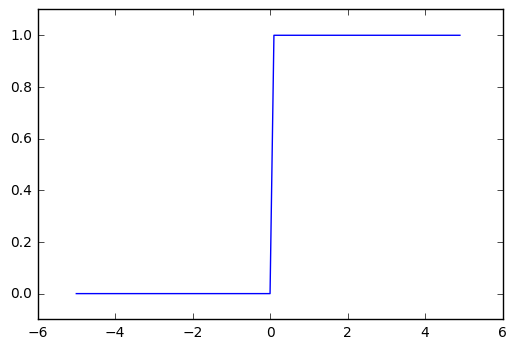

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### シグモイド関数

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

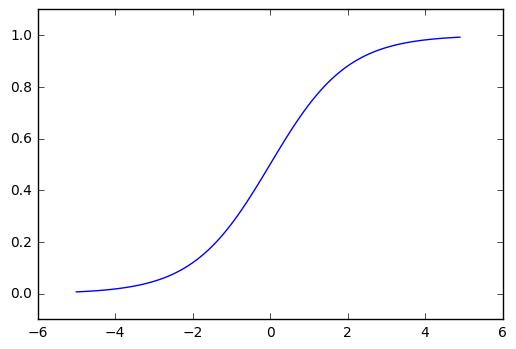

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 滑らかさは異なるが、大きな視点から見ると同じ形をしている
    - 入力が小さいとき → 出力は 0 に近い
    - 入力が大きいとき → 出力は 1 に近い
    - 出力信号は必ず [0 1] に収まる
    
- ともに "非線形関数" である
    - シグモイド関数 → 曲線 / ステップ関数 → 折れ曲がった直線
    - 活性化関数には線形関数を用いる
    
- 活性化関数に線形関数を用いると ... ?
    - NN の層を厚くする意味を失う
    - ex) $h(x) = cx$ のとき → $y(x) = h(h(h(x)))$ の 3 層は $y(x) = ax(a = c^3)$ と同義 ≒ 1 層で実現できちゃう

### ReLU 関数

In [10]:
def relu(x):
    return np.maximum(0, x)

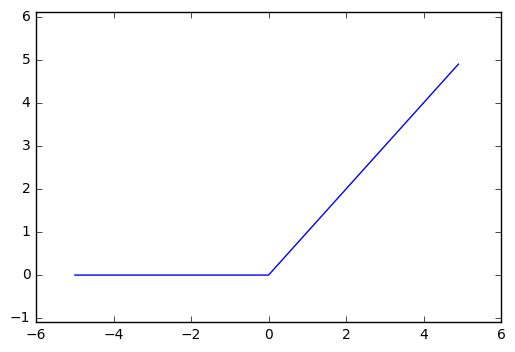

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 6.1)
plt.show()

## 多次元配列の計算

In [18]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [19]:
# 次元数
np.ndim(A)

1

In [20]:
# 配列の形状
A.shape

(4,)

In [21]:
A.shape[0]

4

In [22]:
# 内積 (ドット積)
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [23]:
np.dot(B, A)

array([[23, 34],
       [31, 46]])

In [24]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
np.dot(A, B)

array([[22, 28],
       [49, 64]])

### 3 層ニューラルネットワークの実装

In [25]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [26]:
A1 = np.dot(X, W1) + B1

In [27]:
Z1 = sigmoid(A1)

In [28]:
print(A1)

[ 0.3  0.7  1.1]


In [29]:
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [30]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [31]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [32]:
print(A2)

[ 0.51615984  1.21402696]


In [33]:
print(Z2)

[ 0.62624937  0.7710107 ]


In [34]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [35]:
# 恒等関数
def identity_function(x):
    return x

In [36]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [37]:
print(A3)

[ 0.31682708  0.69627909]


In [38]:
print(Y)

[ 0.31682708  0.69627909]


In [39]:
# まとめる
def init_network():
    network = {}
    # 重みやバイアスの初期化
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [40]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [41]:
network = init_network()

In [42]:
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


## 出力層の設計

### ソフトマックス関数

$$y_k = \frac{\exp(a_k)}{\sum^{n}_{i=1} \exp(a_i)}$$

- 実装上の注意点
    - $e^{10}$ は 20000 を超える
    - $e^{100}$ は 40 桁以上の数値
    - $e^{1000}$ は inf
    - 大きな値同士の割り算は不安定

---
よって式展開をして改善する

$$ y_k = \frac{\exp(a_k)}{\sum^{n}_{i=1} \exp(a_i)}
      = \frac{C \exp(a_k)}{C \sum^{n}_{i=1} \exp(a_i)}
      = \frac{\exp(a_k + \log(C))}{\sum^{n}_{i=1}(\exp(a_i) + \log{C})}
      = \frac{\exp(a_k + C')}{\sum^{n}_{i=1}(\exp(a_i) + C')}$$
      
- $C$ という任意の定数を分子分母に掛ける
- $C$ を $\exp$ の中に入れる
- $\log{C}$ を $C'$ として置き換える
    - $C'$ はどのような値でもいい
    - オーバーフロー対策のために入力値の中で最大の値を用いるのが一般的

In [43]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [44]:
a = np.array([1010, 1000, 990])
softmax(a)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [45]:
y = softmax(a)
np.sum(y)

1.0

## 手書き文字認識

In [50]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [51]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [54]:
mnist['data'].shape

(70000, 784)

In [55]:
from PIL import Image

In [64]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(np.array(pil_img))

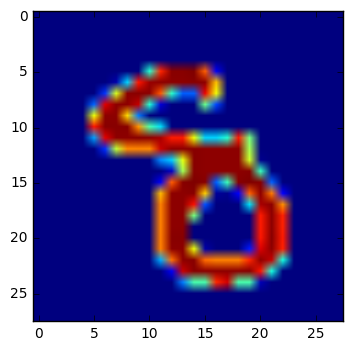

In [71]:
img = mnist['data'][50000]
img = img.reshape(28, 28) # flatten=True として読み込んだデータは、1 次元データとして格納されている
img_show(img)